In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_Negative = '/content/drive/MyDrive/CS490/Dataset_1000/Negative'

In [ ]:
path_Positive = '/content/drive/MyDrive/CS490/Dataset_1000/Positive'

In [ ]:
positive_images = [os.path.join(path_Positive, img) for img in os.listdir(path_Positive)]
negative_images = [os.path.join(path_Negative, img) for img in os.listdir(path_Negative)]

In [ ]:
print("Positive folder contents:")
print(os.listdir(path_Positive))

Positive folder contents:
['16637_1.jpg', '17236_1.jpg', '16446_1.jpg', '03384.jpg', '10260_1.jpg', '15757_1.jpg', '18753_1.jpg', '18436_1.jpg', '19259_1.jpg', '00702.jpg', '05083.jpg', '10869_1.jpg', '02479.jpg', '12487_1.jpg', '08286.jpg', '05792.jpg', '01851.jpg', '11348_1.jpg', '03398.jpg', '07586.jpg', '15373_1.jpg', '09136.jpg', '16087_1.jpg', '14256_1.jpg', '07878.jpg', '11267_1.jpg', '04508.jpg', '18972_1.jpg', '13073_1.jpg', '06365.jpg', '14268_1.jpg', '19435.jpg', '04804.jpg', '11462_1.jpg', '06091.jpg', '17177_1.jpg', '14498_1.jpg', '16762_1.jpg', '11549_1.jpg', '06166.jpg', '17134_1.jpg', '19475.jpg', '03954.jpg', '10355_1.jpg', '02582.jpg', '04619.jpg', '16604_1.jpg', '13955_1.jpg', '18296_1.jpg', '16962_1.jpg', '13014_1.jpg', '08105.jpg', '10417_1.jpg', '17302_1.jpg', '15918_1.jpg', '15413_1.jpg', '18832_1.jpg', '08845.jpg', '09050.jpg', '05662.jpg', '01214.jpg', '18499_1.jpg', '04448.jpg', '15035_1.jpg', '04807.jpg', '15386_1.jpg', '14093_1.jpg', '15192_1.jpg', '10183_1.

In [ ]:
all_images = positive_images + negative_images
labels = ['1'] * len(positive_images) + ['0'] * len(negative_images)  # Convert to strings

In [ ]:
df = pd.DataFrame(list(zip(all_images, labels)), columns=['Filepath', 'Label'])

In [ ]:
df = shuffle(df, random_state=42)

In [ ]:
df.head(5)

,Filepath,Label
1805,/content/drive/MyDrive/CS490/Dataset_1000/Nega...,0
526,/content/drive/MyDrive/CS490/Dataset_1000/Posi...,1
393,/content/drive/MyDrive/CS490/Dataset_1000/Posi...,1
1401,/content/drive/MyDrive/CS490/Dataset_1000/Nega...,0
433,/content/drive/MyDrive/CS490/Dataset_1000/Posi...,1


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
def gen(pre,train,test):
    train_datagen = ImageDataGenerator(
                        preprocessing_function=pre,
                        validation_split=0.2)
    test_datagen = ImageDataGenerator(
                        preprocessing_function=pre)

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=train,
        x_col='Filepath',
        y_col='Label',
        target_size=(100,100),
        class_mode='categorical',
        batch_size=64,
        shuffle=True,
        seed=42
        )
    valid_gen = train_datagen.flow_from_dataframe(
        dataframe=train,
        x_col='Filepath',
        y_col='Label',
        target_size=(100,100),
        class_mode='categorical',
        batch_size=64,
        shuffle=False,
        seed=42
    )
    test_gen = test_datagen.flow_from_dataframe(
        dataframe=test,
        x_col='Filepath',
        y_col='Label',
        target_size=(100,100),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=64,
        shuffle=False
    )
    return train_gen, valid_gen, test_gen

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
RestNet_pre=preprocess_input
train_gen_RestNet, valid_gen_RestNet, test_gen_RestNet = gen(RestNet_pre,train_df,test_df)

Found 1404 validated image filenames belonging to 2 classes.
Found 1404 validated image filenames belonging to 2 classes.
Found 602 validated image filenames belonging to 2 classes.


In [ ]:
def func(name_model):
    pre_model = name_model(input_shape=(100,100, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input

    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              mode='auto')]
    return model, my_callbacks

In [ ]:
ResNet50_model, callback=func(ResNet50)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
history = ResNet50_model.fit(
    train_gen_RestNet,
    validation_data=valid_gen_RestNet,
    epochs=100,
    callbacks=callback
)

Epoch 1/100
22/22 [==============================] - 131s 6s/step - loss: 0.0842 - accuracy: 0.9779 - val_loss: 0.0110 - val_accuracy: 0.9986
Epoch 2/100
22/22 [==============================] - 16s 729ms/step - loss: 0.0100 - accuracy: 0.9986 - val_loss: 0.0042 - val_accuracy: 0.9986
Epoch 3/100
22/22 [==============================] - 12s 534ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0019 - val_accuracy: 0.9993
Epoch 4/100
22/22 [==============================] - 16s 732ms/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 3.2696e-04 - val_accuracy: 1.0000
Epoch 5/100
22/22 [==============================] - 12s 532ms/step - loss: 3.3906e-04 - accuracy: 1.0000 - val_loss: 2.1295e-04 - val_accuracy: 1.0000
Epoch 6/100
22/22 [==============================] - 11s 489ms/step - loss: 1.9762e-04 - accuracy: 1.0000 - val_loss: 1.6678e-04 - val_accuracy: 1.0000
Epoch 7/100
22/22 [==============================] - 12s 578ms/step - loss: 1.5412e-04 - accuracy: 1.0000 - val_loss: 

In [ ]:
def plot(history,df_test,test_gen,train_gen):
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['train', 'val'])

    # Predict Data Test
    pred = ResNet50_model.predict(test_gen )
    pred = np.argmax(pred,axis=1)
    labels = (train_gen.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    # Classification report
    cm=confusion_matrix(df_test.Label,pred)
    clr = classification_report(df_test.Label, pred, target_names=["0", "1"])
    print(clr)
    # Display 6 picture of the dataset with their labels
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(df_test.Filepath.iloc[i+1]))
        ax.set_title(f"True: {df_test.Label.iloc[i+1]}\nPredicted: {pred[i+1]}")
    plt.tight_layout()
    plt.show()

    return history

10/10 [==============================] - 3s 273ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       295
           1       1.00      0.99      1.00       307

    accuracy                           1.00       602
   macro avg       1.00      1.00      1.00       602
weighted avg       1.00      1.00      1.00       602



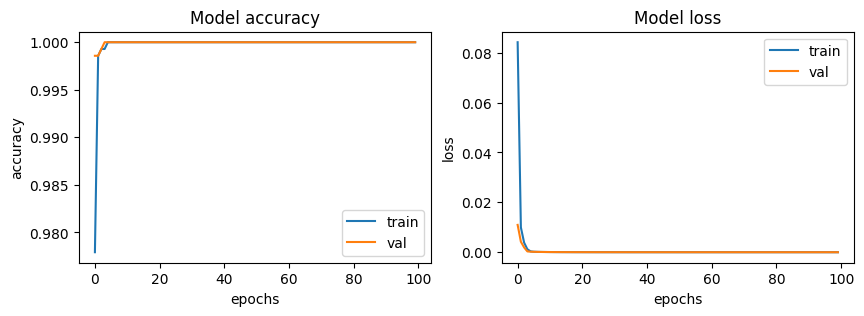

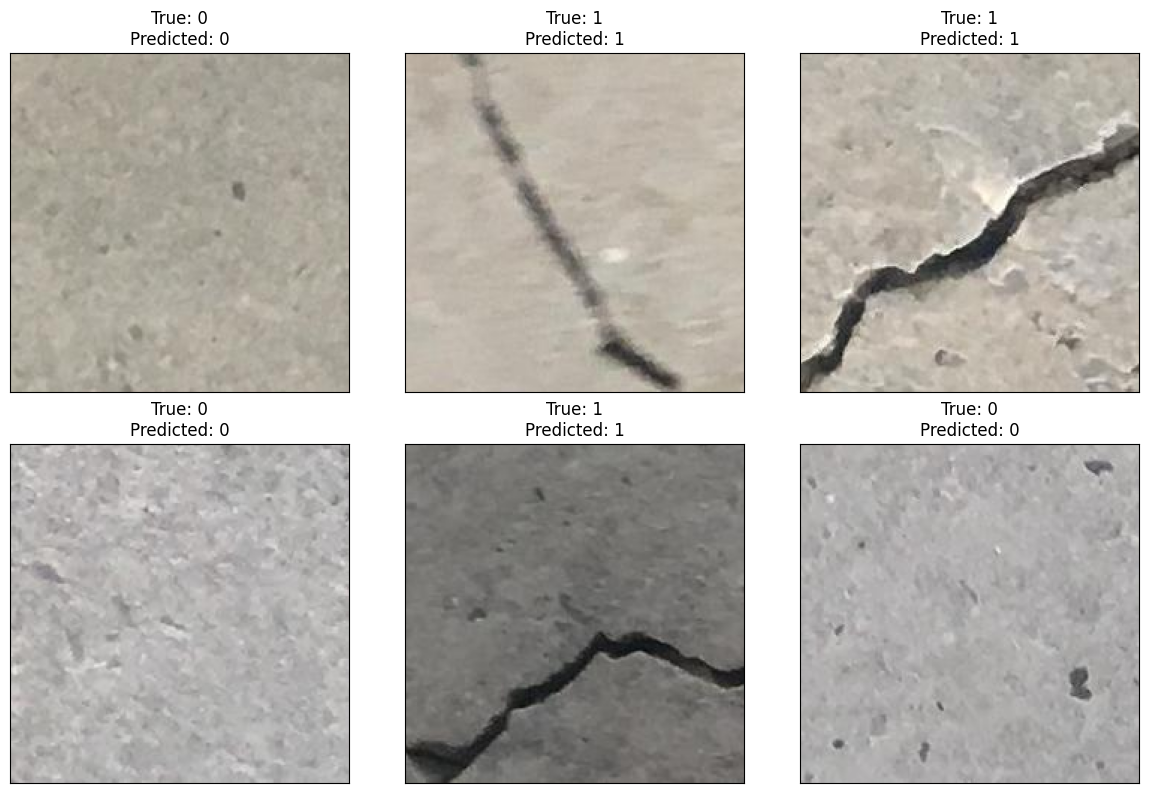

In [ ]:
history_ResNet=plot(history,test_df,test_gen_RestNet,train_gen_RestNet)

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def result_test(test, model_use):
    results = model_use.evaluate(test, verbose=0)

    y_pred = np.argmax(model_use.predict(test), axis=1)
    y_true = test.classes  # Assuming test.labels contains the true labels

    f1 = f1_score(y_true, y_pred, average='weighted')

    print("    Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1] * 100))
    print("      F1 Score: {:.2f}".format(f1))

    return results, f1



In [ ]:
result_ResNet = result_test(test_gen_RestNet,ResNet50_model)

10/10 [==============================] - 2s 224ms/step
    Test Loss: 0.00992
Test Accuracy: 99.67%
      F1 Score: 1.00


In [ ]:
from tensorflow.keras.models import load_model
ResNet50_model.save('my_model')  # Save the model architecture and weights

In [ ]:
from google.colab import files
files.download('my_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>